In [14]:
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('../../')

from SEACells.core import summarize_by_SEACell
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np

# 1. Load & Harmonize
- batch correct per sample

In [3]:
files = [f for f in os.listdir('tmp/seacell/') if f.endswith('_seacell.h5ad')]
files

['S1T_seacell.h5ad',
 'S1V_seacell.h5ad',
 'S2T_seacell.h5ad',
 'S2V_seacell.h5ad',
 'S3T_seacell.h5ad',
 'S3V_seacell.h5ad',
 'S4T_seacell.h5ad',
 'S4V_seacell.h5ad',
 'S5T_seacell.h5ad',
 'S5V_seacell.h5ad',
 'S6T_seacell.h5ad',
 'S6V_seacell.h5ad',
 'O1N21R1_seacell.h5ad',
 'O1N21R2_seacell.h5ad',
 'O1N21R3_seacell.h5ad',
 'O1N21R4_seacell.h5ad',
 'O1TC1R1_seacell.h5ad',
 'O1TC1R2_seacell.h5ad',
 'O1TC1R3_seacell.h5ad',
 'P1N21R1_seacell.h5ad',
 'P1N21R2_seacell.h5ad',
 'P1N21R3_seacell.h5ad',
 'P1N21R4_seacell.h5ad',
 'P1TC1R1_seacell.h5ad',
 'P1TC1R2_seacell.h5ad',
 'P1TC1R3_seacell.h5ad',
 'P1TC1R4_seacell.h5ad',
 'P3N21R1_seacell.h5ad',
 'P3N21R2_seacell.h5ad',
 'P3N21R3_seacell.h5ad',
 'P3N21R4_seacell.h5ad',
 'P3TC1R1_seacell.h5ad',
 'P3TC1R2_seacell.h5ad',
 'P3TC1R3_seacell.h5ad',
 'P3TC1R4_seacell.h5ad',
 'P4N21R1_seacell.h5ad',
 'P4N21R2_seacell.h5ad',
 'P4TC1R1_seacell.h5ad',
 'P4TC1R2_seacell.h5ad',
 'P5N21R1_seacell.h5ad',
 'P5N21R2_seacell.h5ad',
 'P5TC1R1_seacell.h5ad'

In [4]:
adatas = [sc.read_h5ad(os.path.join('tmp/seacell/', f)) for f in files]
adatas

[AnnData object with n_obs × n_vars = 16 × 17618
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 AnnData object with n_obs × n_vars = 89 × 20909
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 AnnData object with n_obs × n_vars = 113 × 21220
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 AnnData object with n_obs × n_vars = 51 × 20721
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 AnnData object with n_obs × n_vars = 91 × 20644
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 AnnData object with n_obs × n_vars = 9 × 15233
     obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
     layers: 'raw',
 Ann

In [5]:
adata = sc.concat(adatas, join = 'outer')
adata

AnnData object with n_obs × n_vars = 15247 × 29437
    obs: 'tumor', 'tumor_purity', 'ncells_per_SEACell', 'author', 'donor_id', 'method', 'assay'
    layers: 'raw'

In [12]:
adata.raw = adata

In [13]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = 'donor_id', n_top_genes = 3000, inplace=True)

In [17]:
sc.tl.pca(adata, use_highly_variable = True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

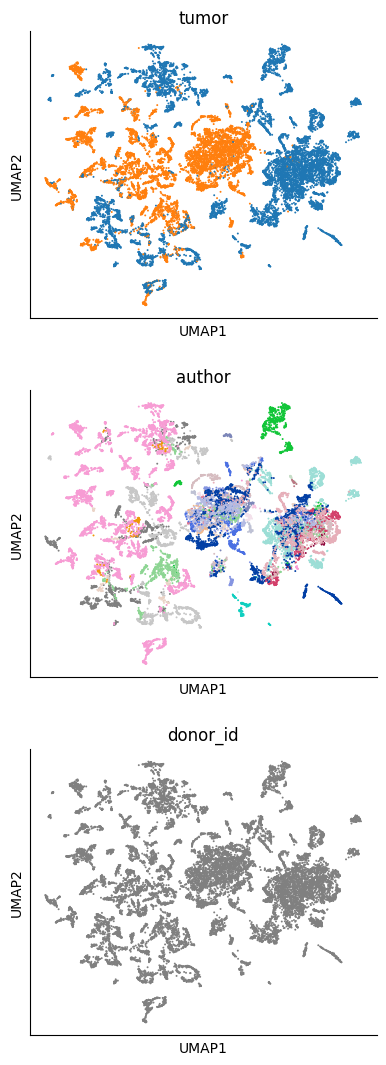

In [19]:
sc.pl.umap(adata, color = ['tumor', 'author', 'donor_id',], ncols = 1, legend_loc = None)

In [ ]:
sc.external.pp.harmony_integrate(adata, key = 'donor_id', max_iter_harmony = 100)

2025-01-17 00:13:27,523 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-17 00:13:42,451 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-17 00:13:42,537 - harmonypy - INFO - Iteration 1 of 100
2025-01-17 00:16:34,197 - harmonypy - INFO - Iteration 2 of 100


In [ ]:
sc.pp.neighbors(adata, use_rep = "X_pca_harmony")
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color = ['tumor', 'author', 'donor_id',], ncols = 1, legend_loc = None)

# 2. Prepare scenic
- normalize per cohort (author)